Título: Signal to Noise

Data: 10/29/2020

Obj: Compute SNR based on the average of the flux per average of error (1-sigma calculated from variance).

Autor: Carlos Roberto

Description:
    As recommended by Vorbin code by Cappellari, we compute the average of the flux in the wavelength range of interest as the signal, and for the noise we use the average of 1-sigma error in te same range (1-sigma error was obtined from variance present in the data cube.)
    
    To know,
$1\sigma = \sqrt{variance}$

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

data_folder = "/home/carlos/Documents/GitHub/Master-Degree/SDP81/Dynamics/New pPXF/"

In [2]:
bin_id  = []
s  = []
n   = []
for i in range(8): #Number of bins
    
    file = (data_folder+'Data/Annealing_Bin04/Binned_Spec/Bin%d.fits'%i)
    hdu = fits.open(file) #Abre o arquivo .fits
        
    data = hdu[1].data #coleta o data
    var = hdu[2].data #coleta a variância
    noise = np.sqrt(var) #determina o erro a partir da variância
        
    signal = np.average(data) #calcula a média
    error = np.average(noise) #calcula a média
    bin_id.append(i)
    s.append(signal)
    n.append(error)
        

Text(0, 0.5, 'SNR')

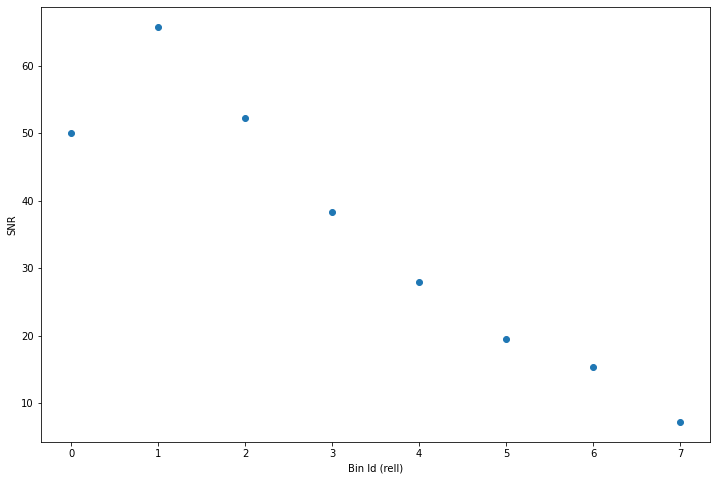

In [3]:
s = np.array(s)
n = np.array(n)
plt.figure(figsize=(12,8))
plt.scatter(bin_id, s/n)
plt.xlabel("Bin Id (rell)")
plt.ylabel("SNR")

In [4]:
np.savetxt('SNR_annealing.txt',np.column_stack([bin_id, s, n, s/n]), header= 'Bin_id signal noise snr', fmt='%i %18e %18e %.18e ',delimiter=' ') #Salva a tabela